<a href="https://colab.research.google.com/github/kilgorjn/CS_5300_AI/blob/main/CS_5300_Abalone_Phase_II_Section13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import urllib.request
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np


if 'abalone.data' not in os.listdir():
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
if 'abalone.names' not in os.listdir():
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names


feature_names = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight']
target_name = 'Rings'
names = feature_names + [target_name]
df = pd.read_csv('abalone.data', names=names) 

#convert the 'Sex' feature from nomimal to numerical 
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

#Convert the 'Rings' column to a binary 'Age', where 0 means 'young', and 1 means 'old'
df['Age'] = pd.DataFrame(np.where(df[target_name]<=9,0,1),columns=['Age'])

#include the output labels as an input feature.
# df['Output'] = df['Age']#
print(df.head())

#drop the 'Rings' feature, it is no longer needed
df.drop(labels='Rings', inplace=True, axis=1)
df.describe()  #un-normalized data

   Sex  Length  Diameter  Height  ...  Viscera Weight  Shell Weight  Rings  Age
0    2   0.455     0.365   0.095  ...          0.1010         0.150     15    1
1    2   0.350     0.265   0.090  ...          0.0485         0.070      7    0
2    0   0.530     0.420   0.135  ...          0.1415         0.210      9    0
3    2   0.440     0.365   0.125  ...          0.1140         0.155     10    1
4    1   0.330     0.255   0.080  ...          0.0395         0.055      7    0

[5 rows x 10 columns]


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.498204
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.500057
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000


In [27]:
#normalize the data in-place
for column in ['Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight']:
  df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
df.describe()  #normalized data (all columns except Sex and Age)


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503,0.498204
std,0.822240,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717,0.500057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052,0.000000
50%,1.000000,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689,0.000000
75%,2.000000,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
np.random.seed(0)  #set a seed to reproduce train and test sets over multiple runs
# msk = np.random.rand(len(df)) < 0.8

print('before shuffle')
print(df.head())
df = df.sample(frac=1, axis=0).reset_index(drop=True)
print('after shuffle')
print(df.head())


train_size = round(df.shape[0]*.7)
val_size = round(df.shape[0]*.2)
test_size = round(df.shape[0]*.1)

print(f'train_size = {train_size}:  val_size = {val_size}  test_size={test_size}')

df_x_train = df[0:train_size]
df_y_train = df_x_train['Age']
df_x_train = df_x_train.drop('Age', axis=1)

df_x_val = df[train_size:train_size+val_size]
df_y_val = df_x_val['Age']
df_x_val = df_x_val.drop('Age', axis=1)


df_x_test = df[train_size+val_size:train_size+val_size+test_size]
df_y_test = df_x_test['Age']
df_x_test = df_x_test.drop('Age', axis=1)






print(f'df shape: {df.shape}')
print(f'training shape(X): {df_x_train.shape}')
print(f'training shape(Y): {df_y_train.shape}')

print(f'validation shape(X): {df_x_val.shape}')
print(f'validation shape(Y): {df_y_val.shape}')


print(f'testing shape(X): {df_x_test.shape}')
print(f'testing shape(Y): {df_y_test.shape}')

print(df_x_train.head())
print(df_x_val.head())
print(df_x_test.head())

before shuffle
   Sex    Length  Diameter  ...  Viscera Weight  Shell Weight  Age
0    2  0.513514  0.521008  ...        0.132324      0.147982    1
1    2  0.371622  0.352941  ...        0.063199      0.068261    0
2    0  0.614865  0.613445  ...        0.185648      0.207773    0
3    2  0.493243  0.521008  ...        0.149440      0.152965    1
4    1  0.344595  0.336134  ...        0.051350      0.053313    0

[5 rows x 9 columns]
after shuffle
   Sex    Length  Diameter  ...  Viscera Weight  Shell Weight  Age
0    2  0.641892  0.621849  ...        0.319289      0.332337    1
1    1  0.574324  0.579832  ...        0.187623      0.191330    0
2    2  0.736486  0.714286  ...        0.491771      0.314898    1
3    1  0.195946  0.184874  ...        0.015142      0.018435    0
4    2  0.770270  0.747899  ...        0.493746      0.374689    1

[5 rows x 9 columns]
train_size = 2924:  val_size = 835  test_size=418
df shape: (4177, 9)
training shape(X): (2924, 8)
training shape(Y): (2924

# Build Model

In [29]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import timeit



METRICS = [
      # keras.metrics.TruePositives(name='tp'),
      # keras.metrics.FalsePositives(name='fp'),
      # keras.metrics.TrueNegatives(name='tn'),
      # keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      # # keras.metrics.Precision(name='precision'),
      # keras.metrics.Recall(name='recall'),
      # keras.metrics.AUC(name='auc'),
]

###########################################################
# Build a model based on the provided architecture
###########################################################
def build_model(architecture:[], hidden_activation='relu', output_activation='sigmoid'):
  model = Sequential()
  model.add(Input(shape=df_x_train.shape[1]))
  # the architecture is a list of node_counts.  
  # Create a hidden layer w/ the specified 
  # number of nodes for each layer in the architecture.
  for nodes in architecture:
    model.add(Dense(nodes, activation=hidden_activation))  
  model.add(Dense(1, activation=output_activation))

  model.compile(
      optimizer=keras.optimizers.RMSprop(),
      loss = keras.losses.BinaryCrossentropy(),
      metrics = METRICS
      )
  return model





#########################################
# Function to train a model and return the training history.
# batch_size and epochs have defaults, but can be overridden
#########################################
def train_model(model, train_x, train_y, val_x, val_y, identifier, batch_size=64, epochs=256):
  # print('--------Training model: ')
  # print(model.summary())
  print(f'training model {identifier}')
  callback_earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

  return model.fit(x=train_x, 
                    y=train_y, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y),
                    verbose=0,
                    callbacks=[callback_earlystop]
                    )

def evaluate_model(model:tf.keras.Model, x_data, y_data):
  return model.evaluate(x_data, y_data, batch_size=128)
  








# Section 13: Demonstrate overfitting when output is in input

training model [50, 50]


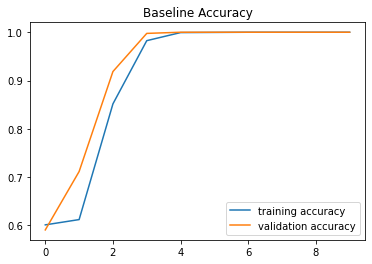

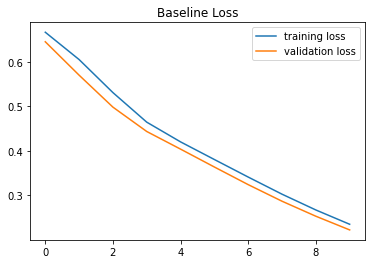

4/4 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 1.0000
['loss', 'accuracy']
[0.22097459435462952, 1.0]


In [25]:
model = build_model([5])
history = train_model(model, df_x_train, df_y_train, df_x_val, df_y_val,[50,50],epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title('Baseline Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title('Baseline Loss')
plt.show()


predictions = model.evaluate(df_x_test, df_y_test, batch_size=128)
print(model.metrics_names)
print(predictions)



In [102]:
# model = build_model([5])
# history = train_model(model, df_x_train, df_y_train, df_x_val, df_y_val,[50,50],epochs=64)


weights = model.get_weights()
# print(len(weights))
# print(len(weights[0]))
# print(len(weights[1]))
# print(len(weights[2]))
# print(len(weights[3]))

print(model.summary())
ndx = 1
data = df_x_train.head(ndx)
data_y = df_y_train.head(ndx)
print("data = ")
print(data)
print(data.shape)
print('data_y = ')
print(data_y)

# layer_0 = model.layers[0]
# print(model.layers[0].get_weights())
# print(model.layers[1].get_weights())

# print(model.layers[0].get_weights()*data)

# prediction = model.predict(data)
# print('--------------')
# print(prediction)
# prediction = np.round(prediction).astype(int).ravel()
# print(prediction)
# print(data_y.to_numpy())
# print(np.array_equal(data_y,prediction))

print('data = ',data)

w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]
print('w = ',w)
print('b = ',b)
npdata = data.to_numpy()
print('npdata = ',npdata)

# print(np.multiply(data,model.layers[0].get_weights()[0]))

# model.save('model.h5')
df_x_test.to_csv("df_x_test.csv")
df_y_test.to_csv("df_y_test.csv")





Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None
data = 
   Sex    Length  Diameter  ...  Shucked Weight  Viscera Weight  Shell Weight
0    2  0.641892  0.621849  ...        0.185945        0.319289      0.332337

[1 rows x 8 columns]
(1, 8)
data_y = 
0    1
Name: Age, dtype: int64
data =     Sex    Length  Diameter  ...  Shucked Weight  Viscera Weight  Shell Weight
0    2  0.641892  0.621849  ...        0.185945        0.319289      0.332337

[1 rows x 8 columns]
w =  [[-0.53971726  0.48836398 -0.41876784 -0.15750133 -0.27415785]
 [ 0.37377846 -0.8008505  